HW 8 Problem 1 Hints

In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio 
import scipy.stats as st
import matplotlib.pyplot as plt
import datetime as dt
from numpy.linalg import svd
%matplotlib inline

***
#### Load iButton air temperature data
Unpack the mat file into numpy arrays, format dates to python datetimes following the method outlined [here](https://sociograph.blogspot.com/2011/04/how-to-avoid-gotcha-when-converting.html).

In [2]:
# load the ibutton data
data = sio.loadmat('iButtons_2008-2010.mat')

# convert matlab format dates to python datetimes
datenums = data['TIME'][:,0]
dates = [dt.datetime.fromordinal(int(d)) + dt.timedelta(days=d%1) - dt.timedelta(days = 366) for d in datenums]

# Unpack the rest of the data
SITE_NAMES = [name[0][0] for name in data['SITE_NAMES']]
SITE_LATS = data['SITE_LATS'][:,0]
SITE_LONS = data['SITE_LONS'][:,0]
SITE_ELEVS = data['SITE_ELEVS'][:,0]
AIR_TEMPERATURE = data['AIR_TEMPERATURE']
AIR_TEMPERATURE_ZEROMEAN = data['AIR_TEMPERATURE_ZEROMEAN']

nt = data['nt'][0][0] # size in the t dimension
nx = data['nx'][0][0] # size in the x dimension (number of sites)

#### Plot a timseries for a single site
Note: use plt.xlim to set x axis limits to "zoom in" to a smaller time period

d:\python\anaconda\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


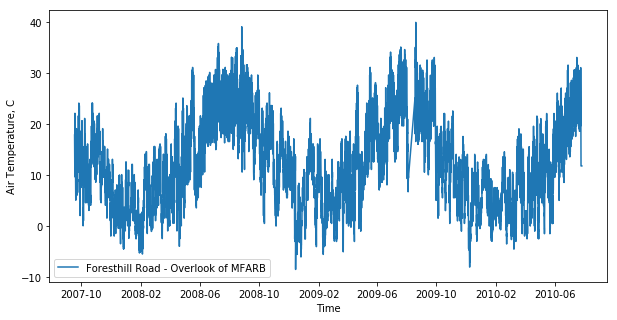

In [3]:
site = 0 # plot the first site of 21

plt.figure(figsize=(10,5))
plt.plot(dates,AIR_TEMPERATURE[:,site],label=SITE_NAMES[site])
plt.legend(loc='best')
plt.ylabel('Air Temperature, C')
plt.xlabel('Time');

# use xlim to set x axis limits to zoom in
# comment xlim out to plot the entire timeseries
#plt.xlim((dates[100], dates[500])); 


#### Decompose the entire dataset using SVD

In [4]:
[U,S,V] = svd(AIR_TEMPERATURE_ZEROMEAN,False)

Plot the first leading pattern of spatial weights (EOF) against latitude and longitude.

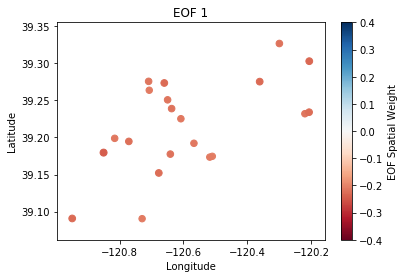

In [5]:
i = 0 # select the first EOF

# Make a scatter plot
plt.scatter(SITE_LONS,SITE_LATS,     # use longitude and latitude as the x and y values
            c=V[i,:],                # set the color map value from V
            s=np.abs(V[i,:]*200),    # also set the size of the marker from abs(V) (x200 to make it easier to see)
            marker='o',cmap='RdBu',  # select marker type and color map
            vmin=-0.4,vmax=0.4)      # set min and max for color map values

# Add labels and format the scatterplot
plt.colorbar(label='EOF Spatial Weight') # add a colorbar and label it
plt.title('EOF {}'.format(i+1)) # add a title
plt.xlabel('Longitude') # x axis label
plt.ylabel('Latitude'); # y axis label

Plot the first leading pattern of temporal weights (PC).

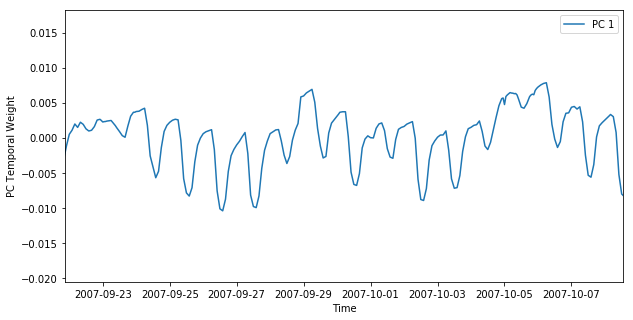

In [6]:

i = 0 # select the first PC

plt.figure(figsize=(10,5))
plt.plot(dates,U[:,i],
         label='PC {}'.format(i+1))
plt.xlim((dates[100], dates[500]))
plt.legend()
plt.ylabel('PC Temporal Weight')
plt.xlabel('Time');

The rest is up to you to complete...